In [10]:
import numpy as np
from matplotlib import pyplot as plt

**Rule**
- Open book, google, wolfram alpha etc.
- No communication regarding exam to anyone except me.
- Don't be stupid and ask people on Chegg or any other exam cheating services
- You will be graded out of 144. Not 160.
- Make sure you notebook runs.

# Part 1 Easy Stuff -- Stright from Exercise (20 points Each)

## MC Integral:
Compute
$$ \iint_C (x-3)(y-2)(z-1) \; dV $$ 
where $C$ is a **sphere** of radius 2 center around (0,0,0)

In [11]:
def gen_point():
    return np.random.random()*2 - 1, np.random.random()*2 - 1, np.random.random()*2 - 1

def f(x, y, z):
    return (x-3) * (y-2) * (z-1)

def g(x, y, z):
    if x**2 + y**2 + z**2 < 2: #inside a sphere of radius 2
        return f(x,y,z)
    else: 
        return 0

s = 0
m = 100000
for i in range(m):
    x, y, z = gen_point()
    s += g(x, y, z)
print(s/m*8)

-46.33300143245755


## Find the location of the minimum of the following function

$$
f(x,y,z) = (x-y)^2 + (x-2z)^2 + (x-3)^2 + 2(y-1)^2 + 3(z-5)^2
$$


In [12]:
def f(v):
    x,y,z = v
    return ((x - y)**2) + ((x-(2*z))**2) + ((x-3)**2) + (2*(y-1)**2) + (3*(z-5)**2)



def partial_i(f, v, i, h=0.001):
    v_p = v.copy()
    v_p[i] += h
    v_m = v.copy()
    v_m[i] -= h
    return (f(v_p) - f(v_m))/(2*h)


def grad(f, v, h=0.0001):
    p = []
    for i in range(len(v)):
        p.append(partial_i(f, v, i, h))
    return np.array(p)

def ttt(f, x0, lmb, n):
    x = x0.copy()
    xs = [x.copy()]
    xs = [x.copy() for i in range(n)]
    for i in range(n):
        x = x - lmb*grad(f, x)
        xs.append(x.copy())
    return x, xs

x, xs = ttt(f, np.array([0., 0., 0.]), 0.001, 10000)
print(x)

[3.79545455 1.93181818 3.22727273]


## Estimate the following number

Consider a unfair dice where the faces are 1,2,3,4,5 and 6. But the probability of getting each face is as follow

| Dice Face | 1    | 2    | 3    | 4    | 5    | 6    |
|-----------|------|------|------|------|------|------|
| Prob      | 1/21 | 2/21 | 3/21 | 4/21 | 5/21 | 6/21 |

If you toss the dice twice, what is the probability that the maximum of the two dices is more than or equal to 4.


In [13]:
def dice():
    x = np.random.random()
    if x < 1/21 :
        return 1
    elif x < 3/21 :
        return 2
    elif x < 6/21 :
        return 3
    elif x < 10/21 :
        return 4
    elif x < 15/21 :
        return 5
    else :
        return 6

ans = [(max(dice(),dice()) >=4) for i in range(100000)]
np.sum(ans)/100000


0.91978

## Solve the following System of Equations
One solution is enough.

$$
x^2 + y + z = 7.4894289999999994\\
x + y^2 + z = 12.784279210000001\\
x + y + z^2 = 15.191911359999999
$$

Hint: there is an answer around x=1.x, y=2.x, z=3.x

In [14]:
from functools import wraps

def f(x, y, z):
    return x**2 + y + z - 7.4894289999999994
def g(x, y, z):
    return x + y**2 + z - 12.784279210000001
def h(x, y, z):
    return x + y + z**2 - 15.191911359999999

def pdiff(f,i,h=0.001):
  @wraps(f)
  def ret(*arg):
    fwd = list(arg)
    fwd[i] += h
    bwd = list(arg)
    bwd[i] -= h
    return (f(*fwd) - f(*bwd))/(2*h)
  return ret

def solve(f,g,h,x0,y0,z0,n):
  x,y,z = x0,y0,z0
  fx = pdiff(f,0)
  fy = pdiff(f,1)
  fz = pdiff(f,2)
  gx = pdiff(g,0)
  gy = pdiff(g,1)
  gz = pdiff(g,2)
  hx = pdiff(h,0)
  hy = pdiff(h,1)
  hz = pdiff(h,2)
  for i in range(n):
    A = [[fx(x, y, z), fy(x, y, z), fz(x, y, z)],
        [gx(x, y, z), gy(x, y, z), gz(x, y, z)],
        [hx(x, y, z), hy(x, y, z), hz(x, y, z)],]
    B = [-f(x, y, z), -g(x, y, z), -h(x, y, z)]
    dx,dy,dz = np.linalg.solve(A,B)
    x += dx
    y += dy
    z += dz
  return x,y,z

solve(f,g,h,1.0,2.0,3.0,10000)

(1.1229999999999993, 2.8839, 3.3444)

## Equal Partitioning

Find 20 numbers from list given below (in numbers) that add up decently close 0.

In [15]:
import random

np.random.seed(333)
numbers = np.random.randn(1000)
number = np.random.choice(numbers,20)
value = 0
for i in number:
    value+=i

for i in range(10000):
    newnum = np.random.choice(numbers,20)
    newvalue = 0
    for i in newnum:
        newvalue+=i
    if(abs(newvalue-0) < abs(value-0)):
        value = newvalue
        number = newnum

print(value)



0.00036498383890859465


# Part 2 Creative Stuff.

## Politically Correct Tour (30)

Consider an governor election at an imaginary city named Sheena. There are 50 districts. Let us suppose that 25 of them are red shirts district and 25 of them are yellow shirts district. A governer candidate named Eren want to visit every district exactly once each(similar to the homework). But with one catch....if the candidate visit two red shirt districts consecutively, or two yellor shirts districts consecutively, the candidate might be seen as leaning toward one side or the other.

The candidate want to maintian political correctness(not virtue correctness), and visit all cities at decently low cost/total distance. 

The location for each district is given below in `xs` and `ys`. The first 25 locations are red shirts district and last 25 locations are yellow shirts district. You may use the euclidean distance.


Find a decently optimal travel path that visit each district exactly once each where he visit alternatively between red and yellow shirt disctrict.


Please plot the path along with the total distance so I can grade.

**Spoiler/Hint** (double click and remove display:none to see the spoiler/hint). If you see it before you think hard about it hard you may regret it though......
<div style="display:none">
Starting with a valid alternate solution. If you put some constraint on how you manipulate the state you can easilty preserve the alternate-ness.
</div>

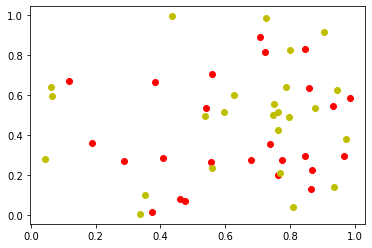

In [16]:
n_red = 25
n_yellow = 25
np.random.seed(5555)
xs = np.random.rand(n_red+n_yellow)
ys = np.random.rand(n_red+n_yellow)
plt.plot(xs[:n_red], ys[:n_red], 'or')
plt.plot(xs[n_red:], ys[n_red:], 'oy')

## Regression with Cyclic target value. (30)

So far, in class, we learned about how to do regression via optimization. The most common cost function that we use is typically the least square one. This problem deals with the situation when it doesn't make sense to use it plainly.

Let suppose we want to predict an **angle** $\theta$ via the relation (think about it as a care moving in a circle and x is a time or something)
$$
    \theta(x, y; a,b) = a x + b
$$
You are given a lot of data for $\theta^{(i)}, x^{(i)}, y^{(i)}$ and you want to find $a, b, c$. Such that it gives you the best fit.


**Bad Approach**

If we were to use the least square method **plainly**
$$cost(a, b) = \sum (\theta(x^{(i)}, y^{(i)}; a, b) - \theta^{(i)})^2$$
you would end up with some funny prediction. There are two problems with this approach
    
 1. The angle of $0.1$ rad and $2\pi + 0.1$ rad are exactly the same but the cost function penalize them quite heavily.
 2. The angle of 1 degree and 359 degree are actually very close but it gets penalized very heavily.


**Your Task**: 
 
A) The find "best fitted" $a, b, c$ for the data below. This means you need to figure out the cost function. Explain clearly what you choose this cost function and how does it fix the problem.

B) Perform the fit and plot predicted $\theta$ vs actual $\theta$ (please normalize it to $0$ to $2 \pi$)



**Grading**
You will be graded on A), but B) will help me check your answer.

If you cost function fix 1. alone you will get a lot of partial credit (75%). Fixing number 2. requires a bit more thought and you may want to scrap what you did to fix 1. alone (See hint).


 
**Spoiler/Hint** (double click and remove display:none to see the spoiler/hint). If you see it before you think hard about it hard you may regret it though......
<div style="display:none">
There are many many approaches to this problem here are some hints. All the hints are separated suggestion for (may be) different approaches.

    0) Least square method sort of works but it require some changes.

    1) You could try to find true angle difference.

    2) You could try to view the angle a point in space instead (this means you will have two number one is sin and the other is cosine).

    3) There is a thing called cosined similarity/cosine distance (https://en.wikipedia.org/wiki/Cosine_similarity)
</div>

In [17]:
import numpy as np
from matplotlib import pyplot as plt
xs = np.linspace(0,20, 100)
thetas = np.array([3.96515529, 3.79589285, 3.80460668, 4.15407905, 4.60142126,
       4.58507349, 4.72244762, 4.996768  , 5.34276449, 5.32066321,
       5.91925438, 0.10835622, 0.11155355, 0.92920285, 0.72741033,
       0.83019996, 1.00060854, 1.29700679, 2.12604413, 2.10341159,
       1.49996779, 2.31222118, 2.38543799, 2.49872911, 3.22586982,
       3.4590875 , 4.17509916, 3.92164722, 4.2805659 , 4.03639032,
       5.2702804 , 5.37831083, 4.94278083, 5.06006715, 5.74476611,
       5.51297422, 5.89954223, 6.23737667, 0.02997406, 0.41499624,
       0.27383099, 0.70373732, 0.84024144, 1.48599369, 1.61487801,
       2.17440339, 2.63618396, 2.35226171, 2.86791023, 2.97176022,
       3.36670093, 3.20293236, 4.2388738 , 4.67377526, 4.58885304,
       4.87229109, 4.84277969, 4.84048003, 5.5626026 , 5.99747158,
       5.54831992, 6.21892757, 6.23070783, 0.01589764, 0.72879202,
       0.52583884, 1.40088771, 1.1463675 , 1.69219034, 0.94868602,
       1.56443541, 1.41121833, 2.61042043, 2.5790102 , 2.92644316,
       3.42052301, 3.62754826, 3.79769435, 4.32015239, 4.3142438 ,
       4.38144705, 4.80248523, 5.4842731 , 5.13794031, 5.1532113 ,
       5.42619961, 0.01402126, 5.9099192 , 0.10687845, 1.05552371,
       0.78189588, 1.1001971 , 1.18751243, 2.20870036, 1.71387036,
       1.68076413, 2.03755553, 2.49541479, 1.99608852, 2.91235582])

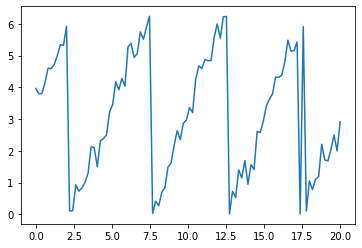

In [18]:
plt.plot(xs, thetas)